In [294]:
import numpy as np
import pandas as pd

In [295]:
df = pd.read_csv("./Data_NguyenVong.csv")

In [296]:
B1 = int(input('Nhập học phí: '))
B2 = float(input('Nhập điểm thi: '))
B3 = int(input('Nhập địa điểm (1: miền bắc, 2: miền trung, 3: miền nam): '))
#B4 = int(input('Nhập địa điểm (1: Khoa Luật, 2: Khoa Khoa học Tự nhiên, 3: Khoa Khoa học Xã hội, 4: Khoa Khoa Công nghệ, 5: Khoa Nghệ thuật, 6: Khoa Kinh doanh,7: Khoa Kỹ thuật, 8: Khoa Y học): '))
print("Học phí đã nhập:", B1)
print("Điểm thi đã nhập:", B2)
print("Địa điểm đã chọn:", B3)
#print("Ngành đã chọn:", B4)

Học phí đã nhập: 26000000
Điểm thi đã nhập: 28.0
Địa điểm đã chọn: 3


In [297]:
C_list = []
dia_diem_dict = {'Miền bắc': 1, 'Miền trung': 2, 'Miền nam': 3}

In [298]:
df.head()

,Tên trường,Chuyên ngành,Học phí,Đánh giá,Địa điểm,Điểm dự kiến,Điểm chuẩn năm trước,Chỉ tiêu
0,Đại học ABC,Khoa Kỹ thuật,20000000,0.0,Miền bắc,20.21,19.46,200
1,Đại học ABC,Khoa Kinh doanh,28000000,1.0,Miền bắc,29.42,30.12,170
2,Đại học ABC,Khoa Khoa học Tự nhiên,21000000,0.0,Miền bắc,23.59,24.07,150
3,Đại học ABC,Khoa Khoa học Xã hội,24000000,0.5,Miền bắc,26.29,25.71,110
4,Đại học ABC,Khoa Nghệ thuật,19000000,0.0,Miền bắc,24.77,25.21,210


In [299]:
from sklearn import preprocessing
Chitieu = df['Chỉ tiêu'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df['Chỉ tiêu'] = min_max_scaler.fit_transform(Chitieu)

# Hocphi = df['Học phí'].values.reshape(-1, 1) #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# df['Học phí'] = min_max_scaler.fit_transform(Hocphi)

# Diemdukien = df['Điểm dự kiến'].values.reshape(-1, 1) #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# df['Điểm dự kiến'] = min_max_scaler.fit_transform(Diemdukien)

# Diemchuan = df['Điểm chuẩn năm trước'].values.reshape(-1, 1) #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# df['Điểm chuẩn năm trước'] = min_max_scaler.fit_transform(Diemchuan)


In [300]:
print(B3)

3


In [301]:
C2D = [[] for i in range(5)]
for i in range(len(df)):

    A1 = df['Học phí'][i]
    A2 = df['Đánh giá'][i]
    A3 = dia_diem_dict[df['Địa điểm'][i]]
    A4 = df['Điểm dự kiến'][i]
    A5 = df['Điểm chuẩn năm trước'][i]
    A6 = df['Chỉ tiêu'][i]

    # Sự phù hợp về học phí
    if B1 >= 2 * A1:
        C1 = 1
    elif B1 <= A1:
        C1 = 0
    else: # A1 <  B1  < 2A1
        C1 = 1 - (B1 - A1) / A1
    print(C1)
    # Đánh giá trường
    C2 = A2  #A2 = 0 :  đánh giá trường trung bình
             #A2 = 0.5 : đánh giá trường tốt
             #A2 = 1 :  đánh giá trường rất tốt
    # Sự phù hợp về địa điểm
    if abs(A3-B3)==0:
        C3=1
    elif abs(A3-B3)==1:
        C3=0.5
    else:
        C3=0

    # Sự phù hợp về điểm thi
    if B2 >= (A4 - abs(A5 - A4)):
        C4 = 1
    elif B2 <= (A4 - abs(A5 - A4)):
        C4 = 0
    else:
        C4 = (B2 - (A4 - abs(A5 - A4))) / (2 * abs(A5 - A4))
        C4 = max(0, min(1, C4))  # Giới hạn C4 trong khoảng [0, 1]

    # Sự phù hợp về chỉ tiêu
    C5 = A6
    # Tạo một mảng để lưu trữ các giá trị của bảng quyết định
    C = np.array([C1, C2, C3, C4, C5])
    C2D[0].append(C1)
    C2D[1].append(C2)
    C2D[2].append(C3)
    C2D[3].append(C4)
    C2D[4].append(C5)
    # Thêm mảng vào danh sách
    C_list.append(C)
df['C1'] = C2D[0]
df['C2'] = C2D[1]
df['C3'] = C2D[2]
df['C4'] = C2D[3]
df['C5'] = C2D[4]



0.7
0
0.7619047619047619
0.9166666666666666
0.631578947368421
0.7
0
0
0.8695652173913043
0
0
0
0
0.9387755102040817
0.5555555555555556
0.5555555555555556
0.9166666666666666
0.375
0.9166666666666666
0
0
0.8695652173913043
0.9166666666666666
0.8695652173913043
0.9166666666666666
0
0.631578947368421
0.7
0.631578947368421
0.8181818181818181
0
0
0.5555555555555556
0
0.8181818181818181
0.47058823529411764
0.7
0
0.9166666666666666
0.9166666666666666
0.8181818181818181
0
0.7
0.96
0.8695652173913043
0
0
0.8181818181818181
0.7317073170731707
0.8695652173913043
0
0
0
0.8181818181818181
0
0.96
0.2666666666666667
0.631578947368421
0.7619047619047619
0.9166666666666666
0.8444444444444444
0
0
0
0.375
0
0.2666666666666667
0.8181818181818181
0
0.96
0.47058823529411764
0
0
0
0
0
0
0
0
0.7619047619047619
0
0
0
0
0.2666666666666667
0.47058823529411764
0
0.375
0.9166666666666666
0.5555555555555556
0.5555555555555556
0.96
0.47058823529411764
0
0.47058823529411764
0.7
0.8181818181818181
0.8695652173913043
0


In [302]:
df

,Tên trường,Chuyên ngành,Học phí,Đánh giá,Địa điểm,Điểm dự kiến,Điểm chuẩn năm trước,Chỉ tiêu,C1,C2,C3,C4,C5
0,Đại học ABC,Khoa Kỹ thuật,20000000,0.0,Miền bắc,20.21,19.46,0.714286,0.700000,0.0,0.0,1,0.714286
1,Đại học ABC,Khoa Kinh doanh,28000000,1.0,Miền bắc,29.42,30.12,0.500000,0.000000,1.0,0.0,0,0.500000
2,Đại học ABC,Khoa Khoa học Tự nhiên,21000000,0.0,Miền bắc,23.59,24.07,0.357143,0.761905,0.0,0.0,1,0.357143
3,Đại học ABC,Khoa Khoa học Xã hội,24000000,0.5,Miền bắc,26.29,25.71,0.071429,0.916667,0.5,0.0,1,0.071429
4,Đại học ABC,Khoa Nghệ thuật,19000000,0.0,Miền bắc,24.77,25.21,0.785714,0.631579,0.0,0.0,1,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Đại học Y Dược Đà Nẵng,Khoa Y học,28000000,1.0,Miền trung,29.00,28.50,0.285714,0.000000,1.0,0.5,0,0.285714
129,Đại học Y Dược Đà Nẵng,Khoa Công nghệ,23500000,0.0,Miền trung,24.80,24.00,0.714286,0.893617,0.0,0.5,1,0.714286
130,Đại học Dược học,Khoa Y học,32000000,1.0,Miền bắc,29.20,28.50,0.214286,0.000000,1.0,0.0,0,0.214286
131,Đại học Dược học,Khoa Nghệ thuật,20000000,0.5,Miền bắc,26.70,26.30,0.500000,0.700000,0.5,0.0,1,0.500000


In [303]:
# Chuyển đổi danh sách thành một ma trận
C_matrix = np.array(C_list)

In [304]:
# Chuẩn hóa ma trận theo cột
C_matrix = C_matrix / np.sqrt(np.sum(C_matrix ** 2, axis=0))

In [305]:
# Giả sử các trọng số của các thuộc tính là như sau
W = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) # Trọng số

In [306]:
# Nhân ma trận với trọng số
C_matrix = C_matrix * W

In [307]:
# Tính phương án tối ưu và phương án tệ nhất
A_opt = np.max(C_matrix, axis=0) # Phương án tối ưu
A_worst = np.min(C_matrix, axis=0) # Phương án tệ nhất

# Tính khoảng cách từ mỗi phương án đến phương án tối ưu và phương án tệ nhất
D_opt = np.sqrt(np.sum((C_matrix - A_opt) ** 2, axis=1)) # Khoảng cách đến phương án tối ưu
D_worst = np.sqrt(np.sum((C_matrix - A_worst) ** 2, axis=1)) # Khoảng cách đến phương án tệ nhất

# Tính độ tương tự với phương án tối ưu và phương án tệ nhất
S = D_worst / (D_opt + D_worst) # Độ tương tự

# Chọn phương án có độ tương tự cao nhất là phương án tốt nhất cho bài toán
best_index = np.argmax(S) # Chỉ số của phần tử lớn nhất trong mảng
print(f"Phương án tốt nhất cho thí sinh là: {best_index}")
print(df.iloc[best_index])

Phương án tốt nhất cho thí sinh là: 43
Tên trường              Đại học JKL
Chuyên ngành              Khoa Luật
Học phí                    25000000
Đánh giá                        0.5
Địa điểm                   Miền nam
Điểm dự kiến                  27.96
Điểm chuẩn năm trước           27.2
Chỉ tiêu                        1.0
C1                             0.96
C2                              0.5
C3                              1.0
C4                                1
C5                              1.0
Name: 43, dtype: object


In [308]:
worst_index = np.argmin(S)  # Chỉ số của phần tử nhỏ nhất trong mảng
print(f"\nPhương án tệ nhất cho thí sinh là: {worst_index}")
print(df.iloc[worst_index])


Phương án tệ nhất cho thí sinh là: 46
Tên trường              Đại học Khoa học Tự nhiên
Chuyên ngành                           Khoa Y học
Học phí                                  29000000
Đánh giá                                      1.0
Địa điểm                                 Miền bắc
Điểm dự kiến                                 28.7
Điểm chuẩn năm trước                         28.1
Chỉ tiêu                                 0.071429
C1                                            0.0
C2                                            1.0
C3                                            0.0
C4                                              0
C5                                       0.071429
Name: 46, dtype: object


In [309]:
# Sắp xếp độ tương tự giảm dần và lấy ra 5 phần tử đầu tiên
top_5_indices = np.argsort(S)[::-1][:5]

# In ra mức rank 5 phương án tốt nhất
print("Top 5 phương án tốt nhất:")
for i, index in enumerate(top_5_indices, start=1):
    print(f"Rank {i}: Phương án {index}")
    print(df.iloc[index])
    print("\n")


Top 5 phương án tốt nhất:
Rank 1: Phương án 43
Tên trường              Đại học JKL
Chuyên ngành              Khoa Luật
Học phí                    25000000
Đánh giá                        0.5
Địa điểm                   Miền nam
Điểm dự kiến                  27.96
Điểm chuẩn năm trước           27.2
Chỉ tiêu                        1.0
C1                             0.96
C2                              0.5
C3                              1.0
C4                                1
C5                              1.0
Name: 43, dtype: object


Rank 2: Phương án 16
Tên trường                  Đại học DEF
Chuyên ngành            Khoa Nghệ thuật
Học phí                        24000000
Đánh giá                            0.5
Địa điểm                       Miền nam
Điểm dự kiến                      26.99
Điểm chuẩn năm trước              26.96
Chỉ tiêu                       0.785714
C1                             0.916667
C2                                  0.5
C3                                  1.

In [310]:
# Sắp xếp độ tương tự giảm dần và lấy ra 5 phần tử đầu tiên
top_5_indices = np.argsort(S)[::-1][:5]

# Tạo DataFrame cho top 5 phương án tốt nhất
top_5_df = df.iloc[top_5_indices]

# In ra mức rank 5 phương án tốt nhất dưới dạng bảng
print("Top 5 phương án tốt nhất:")
print(top_5_df)

Top 5 phương án tốt nhất:
               Tên trường     Chuyên ngành   Học phí  Đánh giá  Địa điểm  \
43            Đại học JKL        Khoa Luật  25000000       0.5  Miền nam   
16            Đại học DEF  Khoa Nghệ thuật  24000000       0.5  Miền nam   
22            Đại học EFG    Khoa Kỹ thuật  24000000       0.5  Miền nam   
113  Đại học Truyền Thông    Khoa Kỹ thuật  18000000       1.0  Miền nam   
97            Đại học QWE   Khoa Công nghệ  23000000       0.0  Miền nam   

     Điểm dự kiến  Điểm chuẩn năm trước  Chỉ tiêu        C1   C2   C3  C4  \
43          27.96                 27.20  1.000000  0.960000  0.5  1.0   1   
16          26.99                 26.96  0.785714  0.916667  0.5  1.0   1   
22          25.78                 26.39  0.714286  0.916667  0.5  1.0   1   
113         27.90                 27.40  0.642857  0.555556  1.0  1.0   1   
97          22.31                 22.37  1.000000  0.869565  0.0  1.0   1   

           C5  
43   1.000000  
16   0.785714  
22   0

In [311]:
# Sắp xếp độ tương tự tăng dần và lấy ra 5 phần tử đầu tiên
bottom_5_indices = np.argsort(S)[:5]

# Tạo DataFrame cho bottom 5 phương án tệ nhất
bottom_5_df = df.iloc[bottom_5_indices]

# In ra mức rank 5 phương án tệ nhất dưới dạng bảng
print("Top 5 phương án tệ nhất:")
print(bottom_5_df)

Top 5 phương án tệ nhất:
                    Tên trường            Chuyên ngành   Học phí  Đánh giá  \
46   Đại học Khoa học Tự nhiên              Khoa Y học  29000000       1.0   
31                 Đại học HIJ         Khoa Nghệ thuật  29000000       1.0   
117                Đại học UVW  Khoa Khoa học Tự nhiên  34000000       1.0   
6            Đại học Bách Khoa               Khoa Luật  31000000       1.0   
7            Đại học Bách Khoa          Khoa Công nghệ  35000000       1.0   

     Địa điểm  Điểm dự kiến  Điểm chuẩn năm trước  Chỉ tiêu   C1   C2   C3  \
46   Miền bắc         28.70                 28.10  0.071429  0.0  1.0  0.0   
31   Miền bắc         30.68                 31.09  0.142857  0.0  1.0  0.0   
117  Miền bắc         30.62                 29.85  0.142857  0.0  1.0  0.0   
6    Miền bắc         29.50                 28.70  0.214286  0.0  1.0  0.0   
7    Miền bắc         29.50                 28.70  0.214286  0.0  1.0  0.0   

     C4        C5  
46    0  0.071429

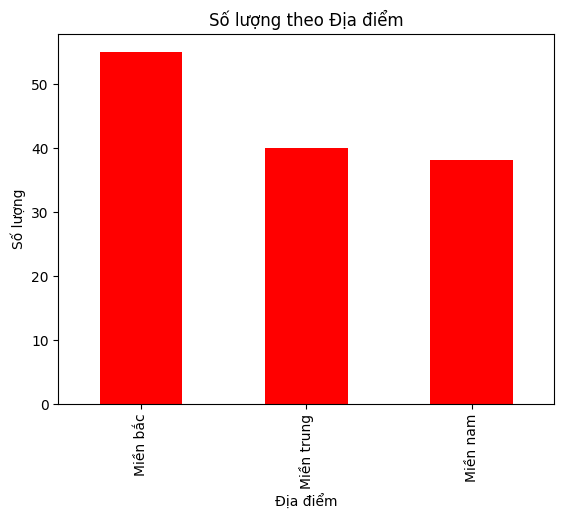

In [312]:
import matplotlib.pyplot as plt

# Biểu đồ cột cho cột 'Địa điểm'
df['Địa điểm'].value_counts().plot(kind='bar', color='red', linestyle='--')

# Thiết lập tiêu đề và các nhãn
plt.title('Số lượng theo Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()


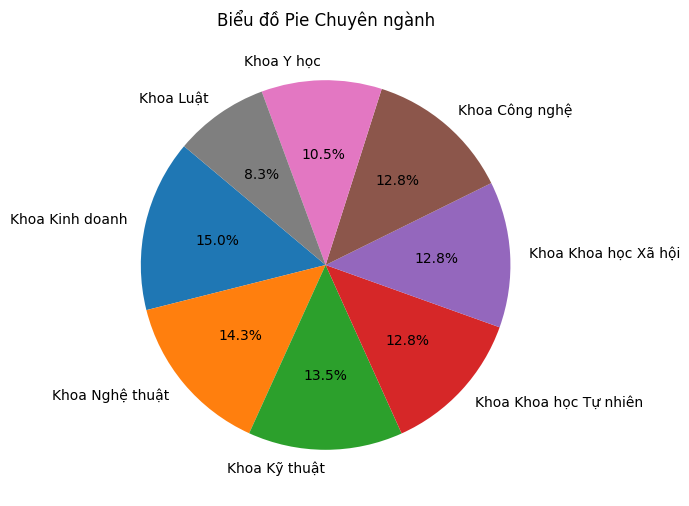

In [313]:
import matplotlib.pyplot as plt
# Tạo biểu đồ pie cho cột 'Chuyên ngành'
chuyen_nganh_counts = df['Chuyên ngành'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(chuyen_nganh_counts, labels=chuyen_nganh_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ Pie Chuyên ngành')
plt.show()

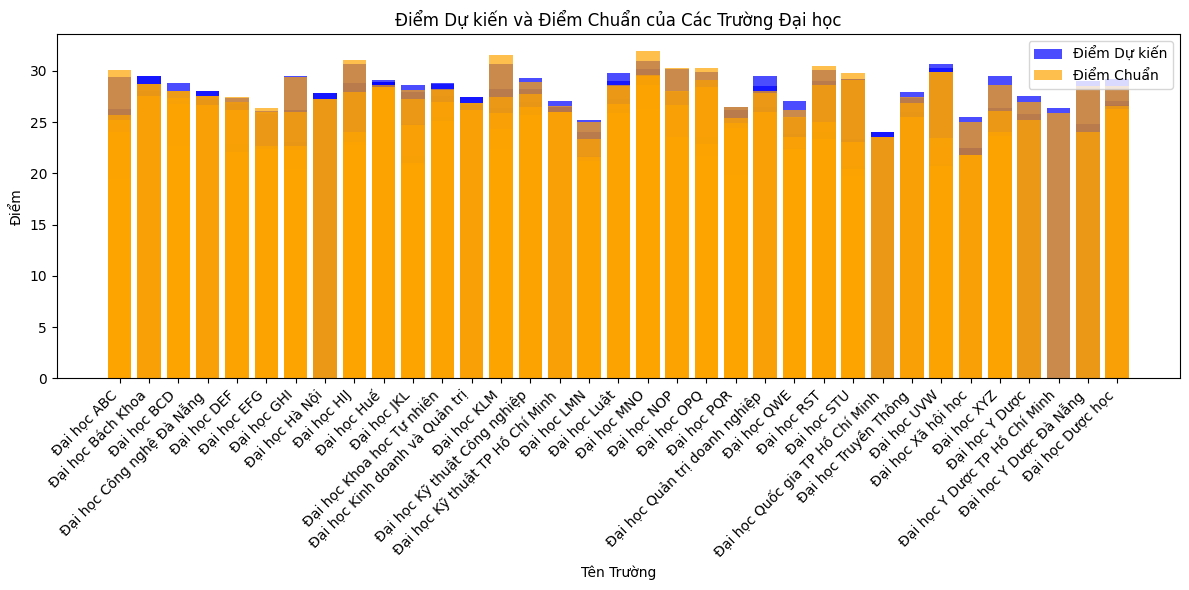

In [314]:
import matplotlib.pyplot as plt

# Lấy tên trường làm nhãn cho trục x
labels = df['Tên trường']

# Lấy điểm dự kiến và điểm chuẩn
diem_du_kien = df['Điểm dự kiến']
diem_chuan = df['Điểm chuẩn năm trước']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(labels, diem_du_kien, label='Điểm Dự kiến', color='blue', alpha=0.7)
plt.bar(labels, diem_chuan, label='Điểm Chuẩn', color='orange', alpha=0.7)

# Đặt các nhãn và tiêu đề
plt.xlabel('Tên Trường')
plt.ylabel('Điểm')
plt.title('Điểm Dự kiến và Điểm Chuẩn của Các Trường Đại học')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


float64
float64


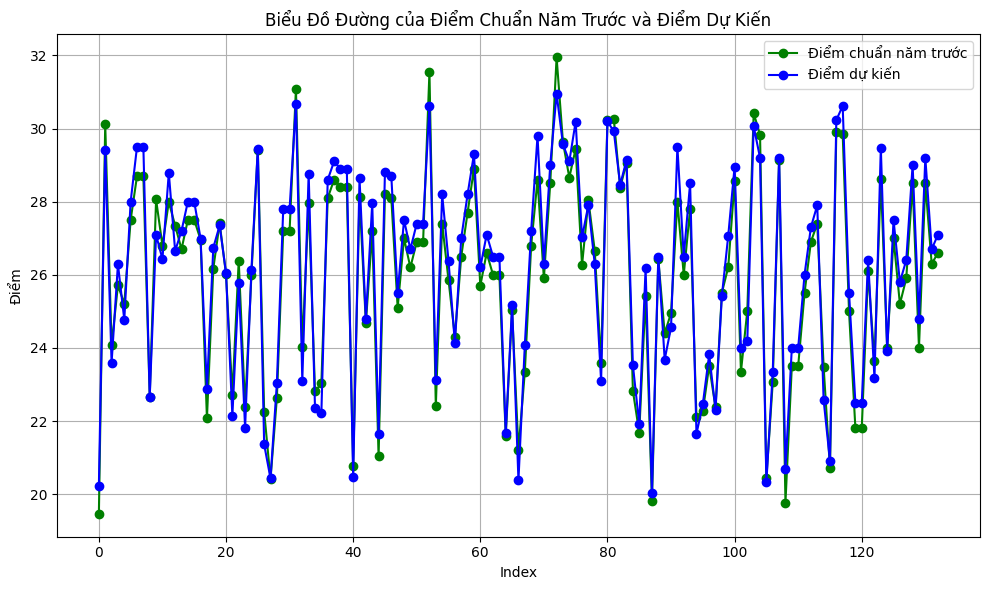

In [315]:
import matplotlib.pyplot as plt

# Kiểm tra kiểu dữ liệu của cột "Điểm dự kiến"
print(df['Điểm dự kiến'].dtype)

# Nếu kiểu dữ liệu không phải là chuỗi, chuyển về chuỗi trước khi xử lý
df['Điểm dự kiến'] = df['Điểm dự kiến'].astype(str).str.replace(',', '').astype(float)

# Kiểm tra lại kiểu dữ liệu
print(df['Điểm dự kiến'].dtype)

# Lấy cột Điểm chuẩn năm trước và Điểm dự kiến
diem_chuan_nam_truoc = df['Điểm chuẩn năm trước']
diem_du_kien = df['Điểm dự kiến']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(diem_chuan_nam_truoc, marker='o', linestyle='-', color='green', label='Điểm chuẩn năm trước')
plt.plot(diem_du_kien, marker='o', linestyle='-', color='blue', label='Điểm dự kiến')

# Đặt các nhãn và tiêu đề
plt.xlabel('Index')
plt.ylabel('Điểm')
plt.title('Biểu Đồ Đường của Điểm Chuẩn Năm Trước và Điểm Dự Kiến')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.grid(True)
plt.show()


<Axes: >

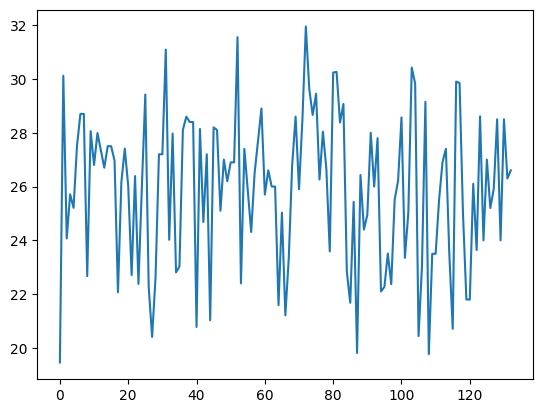

In [316]:
df['Điểm chuẩn năm trước'].plot.line()